In [2]:
import glob
import os

import numpy as np
import pandas as pd
import xarray as xr
import cftime

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

In [2]:
path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/all_member_timeseries/'
files = sorted(glob.glob(os.path.join(path, '*monthly_spg_sst_member_*.nc')))

# Plot a single member

In [3]:
ds = xr.open_dataset('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/all_member_timeseries/monthly_hmxl_member_1251.012.nc')

In [4]:
ds

<xarray.Dataset>
Dimensions:  (time: 3012)
Coordinates:
  * time     (time) object 1850-02-01 00:00:00 ... 2101-01-01 00:00:00
Data variables:
    HMXL     (time) float32 ...

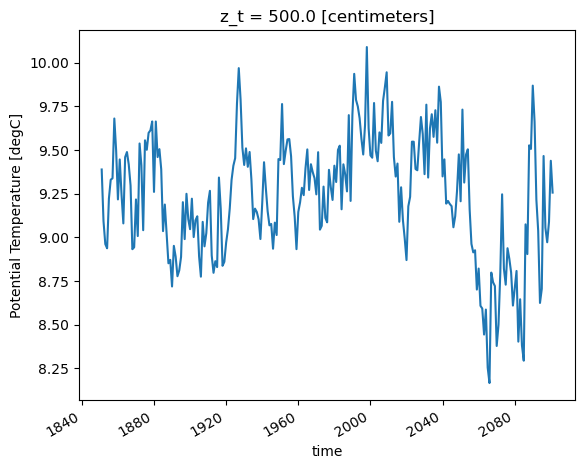

In [5]:
ds = xr.open_dataset(files[2])

start_date = '1850-01-01'
time_index = pd.date_range(start=start_date, periods=len(ds['time']), freq='MS')
ds = ds.assign_coords(time=time_index)

annual_mean = ds['TEMP'].resample(time='1Y').mean()

annual_mean.plot()

# Plot all members

In [8]:
annual_means = []
for file in files:
    ds = xr.open_dataset(file)
    time_index = pd.date_range(start=start_date, periods=len(ds['time']), freq='MS')
    ds = ds.assign_coords(time=time_index)
    
    if 'TEMP' in ds:
        temp_var = ds['TEMP']
    else:
        temp_var = ds['combined_TEMP']
    
    annual_mean = temp_var.resample(time='1Y').mean()
    annual_means.append(annual_mean)

In [9]:
combined_annual_means = xr.concat(annual_means, dim='member', coords='minimal')
ensemble_mean = combined_annual_means.mean(dim='member')

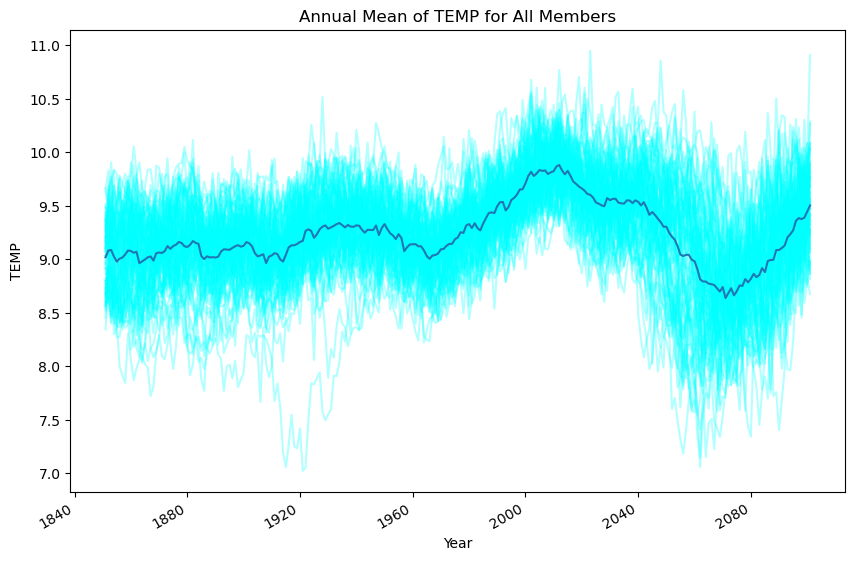

In [10]:
plt.figure(figsize=(10, 6))
for i, annual_mean in enumerate(annual_means):
    annual_mean.plot(alpha=0.3, color='cyan')
ensemble_mean.plot()
plt.title('Annual Mean of TEMP for All Members')
plt.xlabel('Year')
plt.ylabel('TEMP')
plt.show()

# Plot all members of all variables

In [3]:
path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/all_member_timeseries/'
temp_files = sorted(glob.glob(os.path.join(path, '*monthly_spg_sst_member_*.nc')))
hmxl_files = sorted(glob.glob(os.path.join(path, '*monthly_hmxl_member_*.nc')))
shf_files = sorted(glob.glob(os.path.join(path, '*monthly_shf_member_*.nc')))
bsf_files = sorted(glob.glob(os.path.join(path, '*min_BSF_member_*.nc')))

In [24]:
start_date = '1850-01-01'

temp_annual_means = []
for file in temp_files:
    ds = xr.open_dataset(file)
    time_index = pd.date_range(start=start_date, periods=len(ds['time']), freq='MS')
    ds = ds.assign_coords(time=time_index)
    
    if 'TEMP' in ds:
        temp_var = ds['TEMP']
    else:
        temp_var = ds['combined_TEMP']
    
    annual_mean = temp_var.resample(time='1Y').mean()
    temp_annual_means.append(annual_mean)
    
hmxl_annual_means = []
for file in hmxl_files:
    ds = xr.open_dataset(file)
    time_index = pd.date_range(start=start_date, periods=len(ds['time']), freq='MS')
    ds = ds.assign_coords(time=time_index)
    
    if 'HMXL' in ds:
        hmxl_var = ds['HMXL']
    else:
        hmxl_var = ds['combined_HMXL']
    
    annual_mean = hmxl_var.resample(time='1Y').mean()
    hmxl_annual_means.append(annual_mean)
    
shf_annual_means = []
for file in shf_files:
    ds = xr.open_dataset(file)
    time_index = pd.date_range(start=start_date, periods=len(ds['time']), freq='MS')
    ds = ds.assign_coords(time=time_index)
    
    if 'SHF' in ds:
        shf_var = ds['SHF']
    else:
        shf_var = ds['combined_SHF']
    
    annual_mean = shf_var.resample(time='1Y').mean()
    shf_annual_means.append(annual_mean)
    
bsf_annual_means = []
for file in bsf_files:
    ds = xr.open_dataset(file)
    time_index = pd.date_range(start=start_date, periods=len(ds['time']), freq='YS')
    ds = ds.assign_coords(time=time_index)
    
    bsf_var = ds['__xarray_dataarray_variable__']

    annual_mean = bsf_var#.resample(time='1Y').mean()
    bsf_annual_means.append(annual_mean)

In [25]:
combined_annual_means = xr.concat(temp_annual_means, dim='member', coords='minimal')
temp_ensemble_mean = combined_annual_means.mean(dim='member')

combined_annual_means = xr.concat(hmxl_annual_means, dim='member', coords='minimal')
hmxl_ensemble_mean = combined_annual_means.mean(dim='member')

combined_annual_means = xr.concat(shf_annual_means, dim='member', coords='minimal')
shf_ensemble_mean = combined_annual_means.mean(dim='member')

combined_annual_means = xr.concat(bsf_annual_means, dim='member', coords='minimal')
bsf_ensemble_mean = combined_annual_means.mean(dim='member')

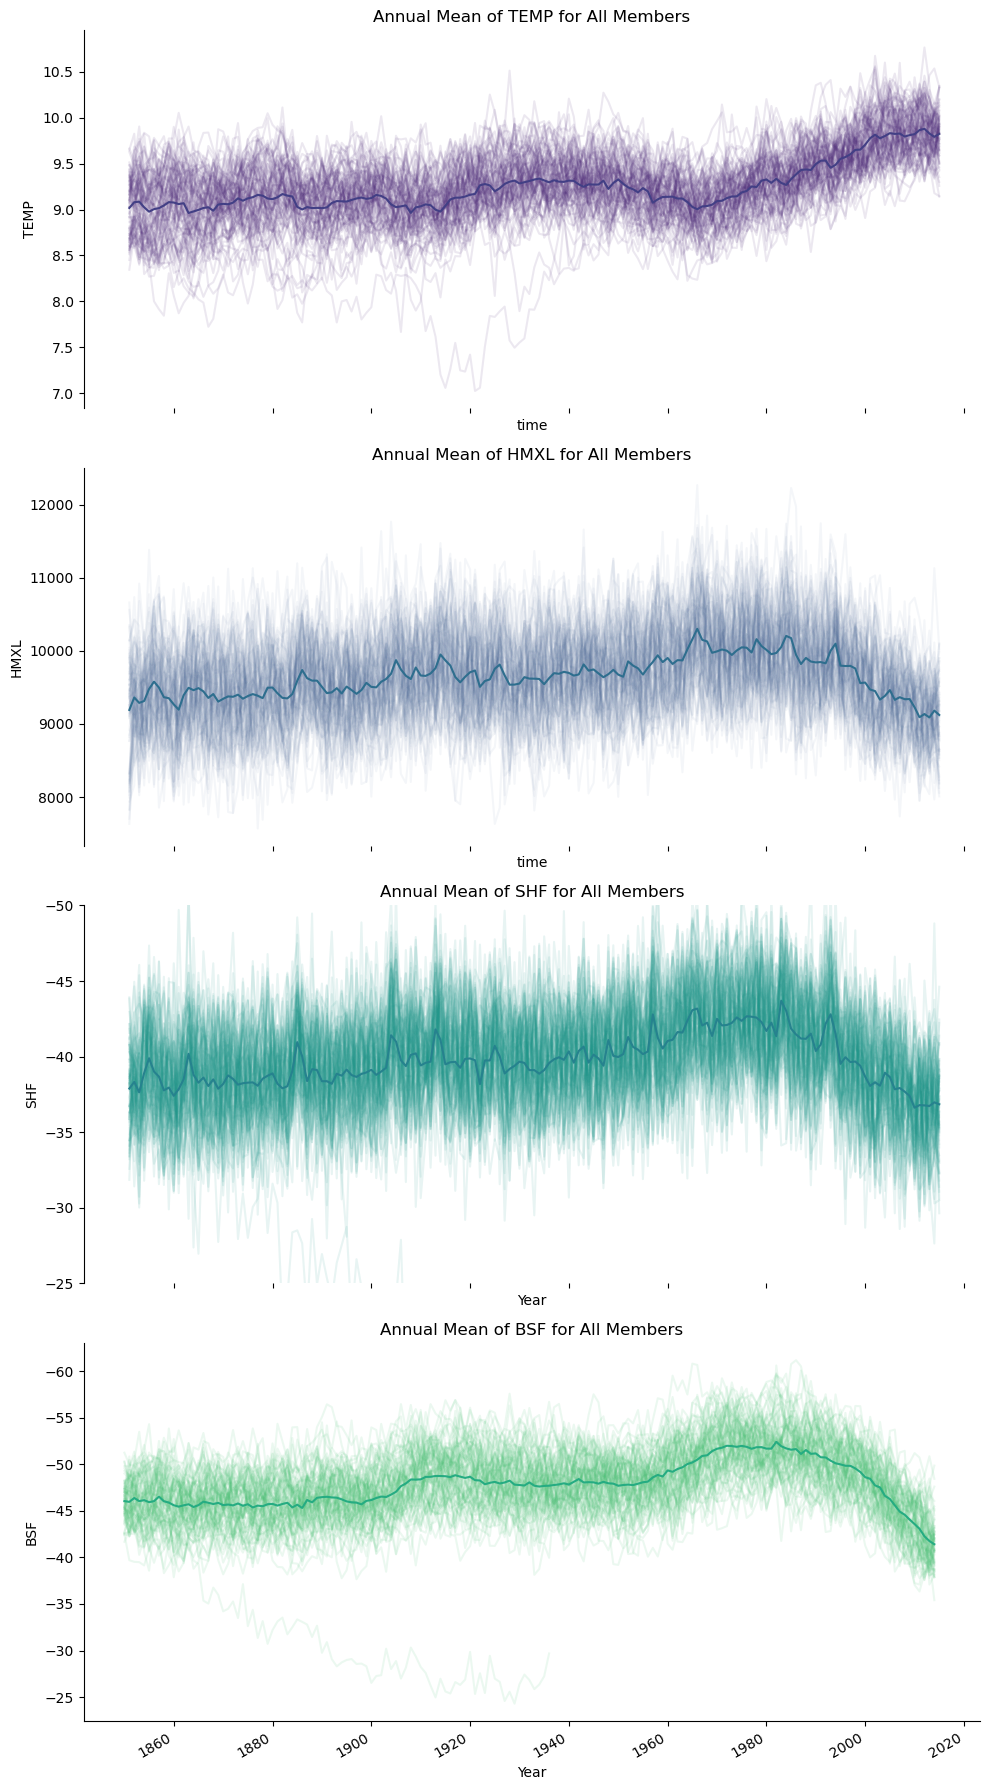

In [27]:
# Define the color map
colors = cm.viridis(np.linspace(0.1, 0.7, 8))

fig, axes = plt.subplots(4, 1, figsize=(10, 18), sharex=True)

# Plot TEMP annual means
for i, annual_mean in enumerate(temp_annual_means):
    annual_mean.sel(time=slice(None, '2014')).plot(ax=axes[0], alpha=0.1, color=colors[0])
temp_ensemble_mean.sel(time=slice(None, '2014')).plot(ax=axes[0], color=colors[1])
axes[0].set_title('Annual Mean of TEMP for All Members')
axes[0].set_ylabel('TEMP')

# Plot HMX annual means
for i, annual_mean in enumerate(hmxl_annual_means):
    annual_mean.sel(time=slice(None, '2014')).plot(ax=axes[1], alpha=0.05, color=colors[2])
hmxl_ensemble_mean.sel(time=slice(None, '2014')).plot(ax=axes[1], color=colors[3])
axes[1].set_title('Annual Mean of HMXL for All Members')
axes[1].set_ylabel('HMXL')

# Plot SHF annual means
for i, annual_mean in enumerate(shf_annual_means):
    annual_mean.sel(time=slice(None, '2014')).plot(ax=axes[2], alpha=0.1, color=colors[5], yincrease=False)
shf_ensemble_mean.sel(time=slice(None, '2014')).plot(ax=axes[2], color=colors[4], yincrease=False)
axes[2].set_title('Annual Mean of SHF for All Members')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('SHF')
axes[2].set_ylim([-25, -50]) 

# Plot BSF annual means
for i, annual_mean in enumerate(bsf_annual_means):
    annual_mean.sel(time=slice(None, '2014')).plot(ax=axes[3], alpha=0.1, color=colors[7], yincrease=False)
bsf_ensemble_mean.sel(time=slice(None, '2014')).plot(ax=axes[3], color=colors[6], yincrease=False)
axes[3].set_title('Annual Mean of BSF for All Members')
axes[3].set_xlabel('Year')
axes[3].set_ylabel('BSF')

# Remove y-axis lines and borders
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    #ax.yaxis.set_ticks_position('left')
    
# Remove x-ticks and x-labels from the first two subplots
#for ax in (axes[0], axes[1]):
#    ax.set_xticks([])
#    ax.set_xlabel('')

# Ensure x-ticks and tick labels are visible on the bottom plot
axes[3].spines['bottom'].set_visible(True)
axes[3].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

plt.tight_layout()
#plt.show()
plt.savefig(os.path.expanduser('~/phase1_CONDA/results/') + 'All_members_incomplete.png', bbox_inches='tight', dpi=300)

# Seperate into different forcings

In [18]:
CBMB_macro = [1001, 1021, 1041, 1061, 1081, 1101, 1121, 1141, 1161, 1181]

SBMB_macro = [1011, 1031, 1051, 1071, 1091, 1111, 1131, 1151, 1171, 1191]

CBMB_micro = range(1, 11)  
SBMB_micro = range(11, 21) 

def check_macro(macro):
    if macro in CBMB_macro:
        return 'CBMB'
    elif macro in SBMB_macro:
        return 'SBMB'
    else:
        return None

def check_micro(micro):
    if micro in CBMB_micro:
        return 'CBMB'
    elif micro in SBMB_micro:
        return 'SBMB'
    else:
        return None

ValueError: cannot reduce over dimensions ['year']. expected either '...' to reduce over all dimensions or one or more of Frozen({'time': 3012}).

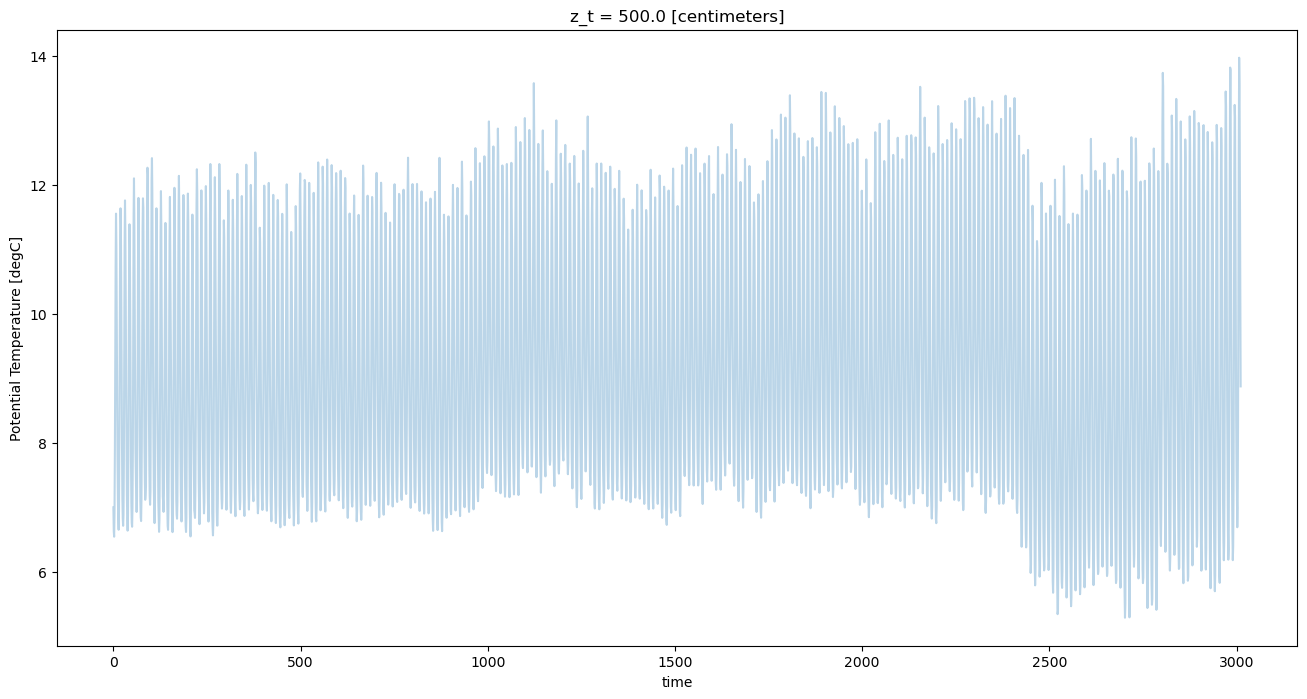

In [19]:
fig, ax = plt.subplots(figsize=(16,8))

all_data = []
cbmb_data = []
sbmb_data = []

for file in files:
    name_parts = file.split('_')[-1].split('.')[:2]
    macro = int(name_parts[0])
    micro = int(name_parts[1])
    macro_cat = check_macro(macro)
    micro_cat = check_micro(micro)
    
    ds = xr.open_dataset(file)
    ds['time'] = xr.decode_cf(ds, use_cftime=True).time
    if isinstance(ds.time.values[0], cftime._cftime.DatetimeNoLeap):
        ds['time'] = xr.DataArray(
        np.array([pd.Timestamp(str(dt)).to_datetime64() for dt in ds.time.values]),
        dims='time')
    
    color = 'tab:blue' if (macro_cat == 'CBMB' or micro_cat == 'CBMB') else 'tab:orange'
    ds.TEMP.plot(color=color, alpha=0.3)

    all_data.append(data)
    if macro_cat == 'CBMB' or micro_cat == 'CBMB':
        cbmb_data.append(data)
    else:
        sbmb_data.append(data)

    combined_cbmb = xr.concat(cbmb_data, dim='year')
    cbmb_mean = combined_cbmb.groupby('year').mean()
    cbmb_mean.plot(color='k', linewidth=2,)

    combined_sbmb = xr.concat(sbmb_data, dim='year')
    sbmb_mean = combined_sbmb.groupby('year').mean()
    sbmb_mean.plot(color='tab:orange', linewidth=2)
    
if all_data:
    combined_data = xr.concat(all_data, dim='year')
    mean_data = combined_data.groupby('year').mean()
    mean_data.plot.line('--', color='black', linewidth=2)

plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Sea Surface Temperature')
# Create patches for the legend
legend_handles = [
    mpatches.Patch(color='tab:blue', label='CBMB Mean'),
    mpatches.Patch(color='tab:orange', label='SBMB Mean'),
    mpatches.Patch(color='black', label='Overall Mean')
]

# Adding the legend with created handles
plt.legend(handles=legend_handles)

plt.show()

In [4]:
CBMB_macro = [1001, 1021, 1041, 1061, 1081, 1101, 1121, 1141, 1161, 1181]

SBMB_macro = [1011, 1031, 1051, 1071, 1091, 1111, 1131, 1151, 1171, 1191]

CBMB_micro = range(1, 11)  
SBMB_micro = range(11, 21) 

def check_macro(macro):
    if macro in CBMB_macro:
        return 'CBMB'
    elif macro in SBMB_macro:
        return 'SBMB'
    else:
        return None

def check_micro(micro):
    if micro in CBMB_micro:
        return 'CBMB'
    elif micro in SBMB_micro:
        return 'SBMB'
    else:
        return None

In [47]:
def load_ds(file_path):
    ds = xr.open_dataset(file_path, decode_times=False)
    ds['time'] = xr.decode_cf(ds, use_cftime=True).time
    if isinstance(ds.time.values[0], cftime._cftime.DatetimeNoLeap):
        ds['time'] = xr.DataArray(
            np.array([pd.Timestamp(str(dt)).to_datetime64() for dt in ds.time.values]),
            dims='time')
    return ds

In [62]:
winter_months = ds.sel(time=ds['time'].dt.month.isin([12, 1, 2, 3]))

In [ ]:

        data=[f"{date.year-1}" if date.month == 12 else f"{date.year}" for date in winter_months[time_var].values

In [59]:
def compute_djfm_average(ds, time_var, data_var):
    winter_months = ds.sel(
        time=ds[time_var].dt.month.isin([12, 1, 2, 3]))
    winter_months['DJF'] = xr.DataArray(
        data=[f"{date.year-1}" if date.month == 12 else f"{date.year}" for date in winter_months[time_var].values], 
        dims=[time_var])
    djfm_means = winter_months.groupby('DJF').mean(dim=time_var)
    return djfm_means

In [60]:
ds = load_ds('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/all_member_timeseries/monthly_hmxl_member_1001.001.nc')
djfm_means = compute_djfm_average(ds, time_var='time', data_var='HMXL')

AttributeError: 'numpy.datetime64' object has no attribute 'month'

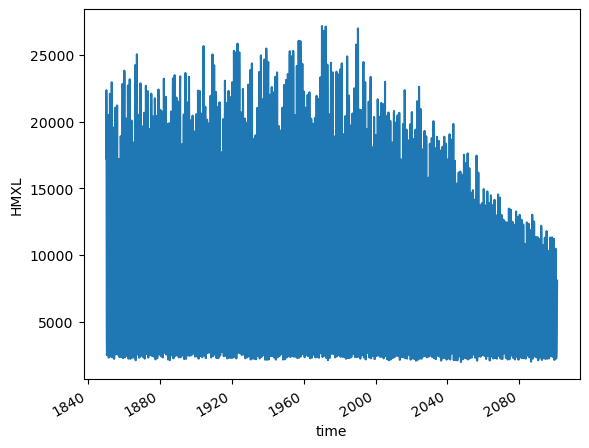

In [44]:
ds.HMXL.plot()

In [52]:
ds.time

<xarray.DataArray 'time' (time: 3012)>
array(['1850-02-01T00:00:00.000000000', '1850-03-01T00:00:00.000000000',
       '1850-04-01T00:00:00.000000000', ..., '2100-11-01T00:00:00.000000000',
       '2100-12-01T00:00:00.000000000', '2101-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1850-02-01 1850-03-01 ... 2101-01-01

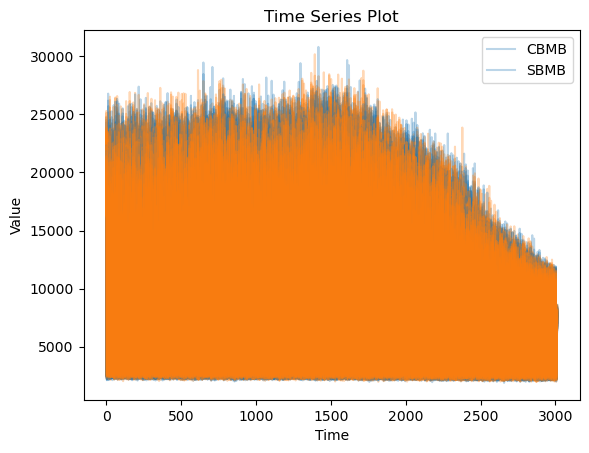

In [50]:
for file in files:
    name_parts = file.replace('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/all_member_timeseries/monthly_hmxl_member_', '').split('.')
    macro = int(name_parts[0])
    micro = int(name_parts[1])

    macro_cat = check_macro(macro)
    micro_cat = check_micro(micro)

    if macro_cat or micro_cat:
        ds = load_ds(file)
        data = ds.HMXL.values

        color = 'tab:blue' if (macro_cat == 'CBMB' or micro_cat == 'CBMB') else 'tab:orange'
        plt.plot(data, color=color, alpha=0.3)
            
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Plot')
plt.legend(['CBMB', 'SBMB'])
plt.show()

Failed to open /Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/all_member_timeseries/annual_sst_member_1021.001.nc: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy', 'zarr']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html
Failed to open /Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/all_member_timeseries/annual_sst_member_1041.001.nc: x and y can be no greater than 2D, but have shapes (252,) and (252, 384, 320)
Failed to open /Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/all_member_timeseries/annual_sst_member_1061.001.nc: x and y can be no greater than 2D, but have shapes (252,) and (252, 384, 320)
Failed to open /Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/all_member_timeseries/annual_sst_member_10

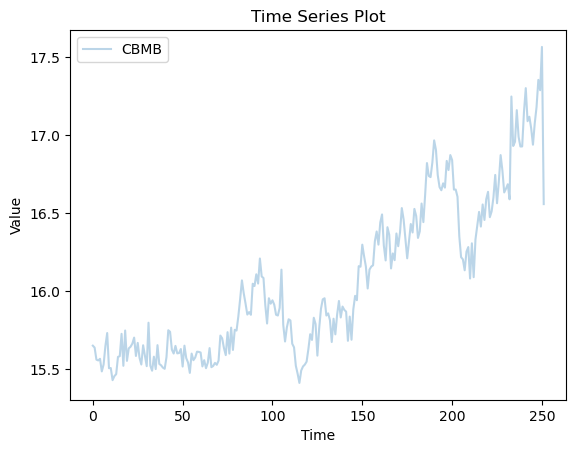

In [4]:
for file in files:
    name_parts = file.replace('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/all_member_timeseries/annual_sst_member_', '').split('.')
    macro = int(name_parts[0])
    micro = int(name_parts[1])

    macro_cat = check_macro(macro)
    micro_cat = check_micro(micro)

    if macro_cat or micro_cat:
        
        try:
            ds = xr.open_dataset(file)
            data = ds.TEMP.values
        
            color = 'tab:blue' if (macro_cat == 'CBMB' or micro_cat == 'CBMB') else 'tab:orange'
            plt.plot(data, color=color, alpha=0.3)
        
        except ValueError as e:
            print(f"Failed to open {file}: {str(e)}")
            
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Plot')
plt.legend(['CBMB', 'SBMB'])
plt.show()

Failed to open /Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/all_member_timeseries/annual_sst_member_1021.001.nc: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy', 'zarr']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html


ValueError: Line plots are for 1- or 2-dimensional DataArrays. Passed DataArray has 3 dimensions

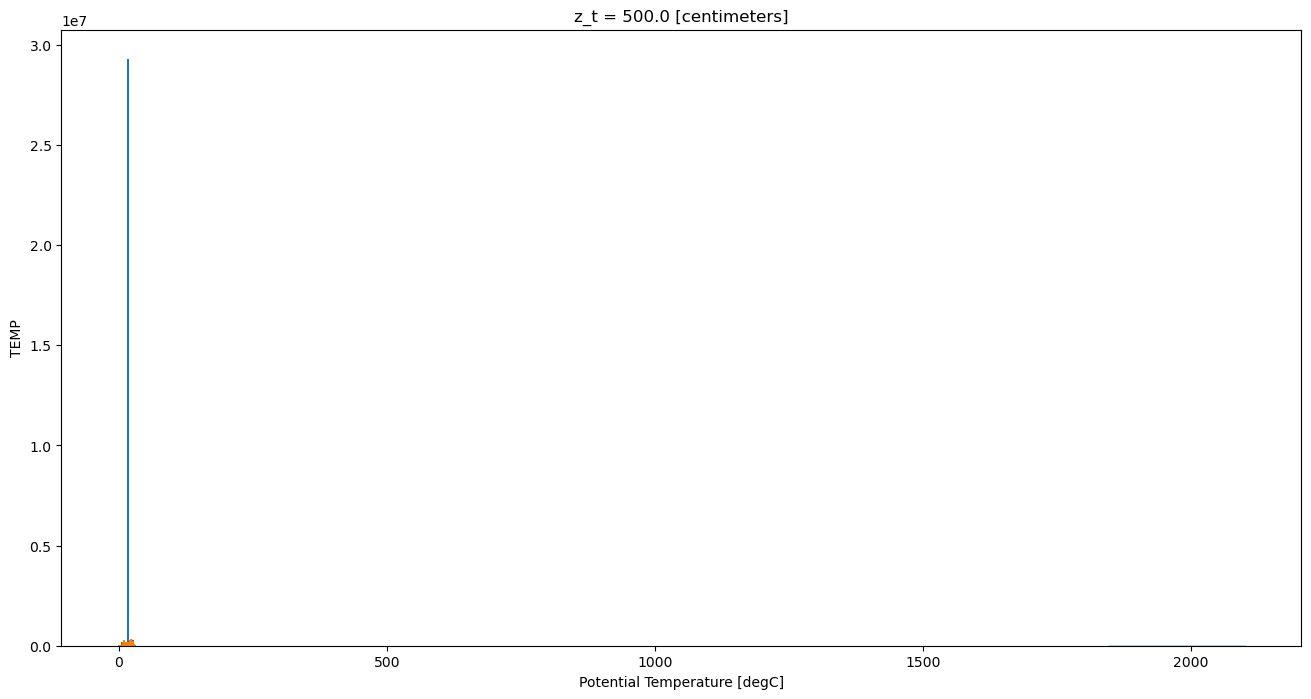

In [7]:
fig, ax = plt.subplots(figsize=(16,8))

all_data = []
cbmb_data = []
sbmb_data = []

for file in files:
    name_parts = file.split('_')[-1].split('.')[:2]
    macro = int(name_parts[0])
    micro = int(name_parts[1])
    
    macro_cat = check_macro(macro)
    micro_cat = check_micro(micro)
    
    if macro_cat or micro_cat:
        try:
            data = xr.open_dataset(file).TEMP

            color = 'tab:blue' if (macro_cat == 'CBMB' or micro_cat == 'CBMB') else 'tab:orange'
            data.plot(color=color, alpha=0.3)

            all_data.append(data)

            if macro_cat == 'CBMB' or micro_cat == 'CBMB':
                cbmb_data.append(data)
            else:
                sbmb_data.append(data)
        except ValueError as e:
            print(f"Failed to open {file}: {str(e)}")
            
if cbmb_data:
    combined_cbmb = xr.concat(cbmb_data, dim='year')
    cbmb_mean = combined_cbmb.groupby('year').mean()
    cbmb_mean.plot(color='tab:blue', linewidth=2,)

if sbmb_data:
    combined_sbmb = xr.concat(sbmb_data, dim='year')
    sbmb_mean = combined_sbmb.groupby('year').mean()
    sbmb_mean.plot(color='tab:orange', linewidth=2)
    
if all_data:
    combined_data = xr.concat(all_data, dim='year')
    mean_data = combined_data.groupby('year').mean()
    mean_data.plot.line('--', color='black', linewidth=2)

plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Sea Surface Temperature')
# Create patches for the legend
legend_handles = [
    mpatches.Patch(color='tab:blue', label='CBMB Mean'),
    mpatches.Patch(color='tab:orange', label='SBMB Mean'),
    mpatches.Patch(color='black', label='Overall Mean')
]

# Adding the legend with created handles
plt.legend(handles=legend_handles)


plt.show()